In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [5]:
data = pd.read_csv('winequality-red.csv',sep=';')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
qual_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

data.loc[:,"qaulity"] = data.quality.map(qual_mapping)

In [15]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,qaulity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [13]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'qaulity'],
      dtype='object')

In [18]:
data = data.sample(frac=1).reset_index(drop=True)

data_train = data.head(1000)
data_test = data.tail(599)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [24]:
classifier = DecisionTreeClassifier(max_depth=3)

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']  
classifier.fit(data_train[cols],data_train.quality)

DecisionTreeClassifier(max_depth=3)

In [25]:
train_predict = classifier.predict(data_train[cols])
test_predict = classifier.predict(data_test[cols])

train_accuracy = metrics.accuracy_score(data_train.quality,train_predict)
test_accuracy = metrics.accuracy_score(data_test.quality,test_predict)

print(train_accuracy,test_accuracy)

0.595 0.5626043405676127


In [26]:
classifier = DecisionTreeClassifier(max_depth=9)

cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']  
classifier.fit(data_train[cols],data_train.quality)

DecisionTreeClassifier(max_depth=9)

In [27]:
train_predict = classifier.predict(data_train[cols])
test_predict = classifier.predict(data_test[cols])

train_accuracy = metrics.accuracy_score(data_train.quality,train_predict)
test_accuracy = metrics.accuracy_score(data_test.quality,test_predict)

print(train_accuracy,test_accuracy)

0.874 0.6026711185308848


### Visualising train and test Accuracies

In [30]:
matplotlib.rc('xtick',labelsize = 20)
matplotlib.rc('ytick',labelsize = 20)

In [31]:
train_accuracies = [0.5]
test_accuracies = [0.5]

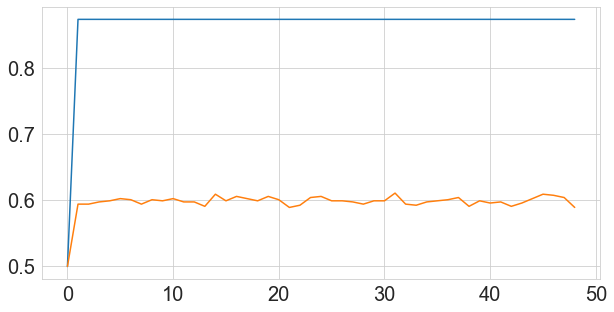

In [33]:
for i in range(1,25):
    classifier2 = DecisionTreeClassifier(max_depth=i)
    
    classifier.fit(data_train[cols],data_train.quality)
    
    train_predict = classifier.predict(data_train[cols])
    test_predict = classifier.predict(data_test[cols])

    train_accuracy = metrics.accuracy_score(data_train.quality,train_predict)
    test_accuracy = metrics.accuracy_score(data_test.quality,test_predict)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10,5))
sns.set_style('whitegrid')
plt.plot(train_accuracies,label='train_accuracy')
plt.plot(test_accuracies,label='test_acc')
plt.legend(loc=)